# Instalación de librerias

In [1]:
!pip install pysentimiento
!pip install praw
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 14.2 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171031 sha256=3550bb9100f436eb5b506033c00f24c288010f9363d08edda86619356d

# Importación de bibliotecas

In [18]:
import praw
from pysentimiento import create_analyzer
import transformers
from langdetect import detect
import matplotlib.pyplot as plt
from collections import Counter

# Configuración de credenciales de Reddit

In [3]:
reddit_credentials = {
    "client_id": "gRaBmOex12tAGQ0LdQlH2Q",
    "client_secret": "-Dj0KbsIhowEvHPOba13Yvo4KI-mOg",
    "user_agent": "Silent-Sentence-911"
}

# Inicialización de cliente de Reddit

In [4]:
reddit = praw.Reddit(
    client_id=reddit_credentials["client_id"],
    client_secret=reddit_credentials["client_secret"],
    user_agent=reddit_credentials["user_agent"]
)

# Consulta en Reddit

In [72]:
# Realiza una búsqueda en Reddit
subreddit = reddit.subreddit("all")  # Puedes especificar un subreddit específico si lo deseas
posts = subreddit.search("Bancolombia", limit=50)

# Ver consulta de Reddit

In [69]:
# Imprime las publicaciones encontradas
for post in posts:
  try:
    lang = detect(post.title)
    if lang == 'es':
      print(f"Título: {post.title}")
    try:
      lang = detect(post.selftext)
      if lang == 'es':
        print(f"Contenido: {post.selftext}")
        print(f"Puntuación: {post.score}")
        print(f"Fecha de creación: {post.created_utc}\n")
    except:
      pass
  except:
    pass

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Bancolombia
Contenido: ¿Alguien alguna vez depositó dinero en su cuenta de Bancolombia y le apareció el nombre equivocado? Si es así, ¿te devolvieron el dinero?
Puntuación: 6
Fecha de creación: 1698960419.0

Título: ¿Problemas con Bancolombia recientemente?
Contenido: Buenas, tenía una duda. Ayer que pagaron hice mi retiro normal (Bancolombia), pero viendo los movimientos de la cuenta ví que había una transacción de débito de 24,000 pesos. Del trabajo para la casa lo único que recuerdo haber pagado con la tarjeta de debido del banco es el Transmilenio, nunca lo había hecho pero no tenía plata en la tarjeta del sitp ni plata física para poder recargarla. 

Entonces, mi pregunta es: como válido que el cobro de esos 24k haya sido por ese unico transporte? Por qué cobran 24k si fue por eso? Hay forma de ver más detalles y hora de la transacción? 

Ya intenté validar desde la app y desde la sucursal virtual pero no aparecen detalles relevantes de ningún movimiento, espero alguien se

# Configuración del modelo

In [6]:
transformers.logging.set_verbosity(transformers.logging.ERROR)

analyzer = create_analyzer(task="sentiment", lang="es")

# Analisis de los posts

In [71]:
#for post in posts:
#    print(f"Post title: {post.title}\n")
#    print(f"Post body: {post.selftext}\n")
#    post.comments.replace_more(limit=None)  # para obtener todos los comentarios
#    for comment in post.comments.list():
#        analysis = analyzer.predict(comment.body)  # Analizar el comentario
#        print(f"Comment: {comment.body}")
#        print(f"Sentiment: {analysis.output}\n")

for post in posts:
  try:
    lang = detect(post.title)
    if lang == 'es':
      try:
        lang = detect(post.selftext)
        if lang == 'es':
          print(f"Título: {post.title}")
          print(f"Contenido: {post.selftext}")
          post.comments.replace_more(limit=None)  # para obtener todos los comentarios
          for comment in post.comments.list():
              analysis = analyzer.predict(comment.body)  # Analizar el comentario
              print(f"Comment: {comment.body}")
              print(f"Sentiment: {analysis.output}\n")
      except:
        pass
  except:
    pass

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Bancolombia
Contenido: ¿Alguien alguna vez depositó dinero en su cuenta de Bancolombia y le apareció el nombre equivocado? Si es así, ¿te devolvieron el dinero?
Comment: 
# Comentario de Automoderación:


Recuerda revisar las [reglas](https://www.reddit.com/r/medellin/about/wiki/rules/) de r/medellin

* Si consideras este post interesante, aplica la flecha arriba Upvote

* Si encuentras este post molesto o poco interesante, aplica la flecha abajo Downvote

Queremos una comunidad colaborativa y respetuosa.
¡Gracias!

*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/medellin) if you have any questions or concerns.*
Sentiment: NEU

Comment: Sí, por error consigné a una cuenta de una empresa, llamé ahí mismo a Bancolombia y me dijeron que al ser transferencia, ellos lo único que podían hacer era contactar al titular de la cuenta para que autorizara la devolución. 

El titular de la cuenta nunca respo

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: Jajajajajaja lastimosamente no lo soy :(  igualmente me he planteado no entregar esa plata asi por asi, preferiria hacerlo con el banco de intermediario! Y creo que seria lo mejor, asi que si te equivocaste llama a ver que hacen, tal vez la otra persona esta dispuesta a devolver el dinero como yo
Sentiment: NEU

Título: Prestamos con bancolombia
Contenido: Hola hermanos este es mi primer post, soy un venezolano que ya lleva dos años en Colombia y realmente nunca me había planteado solicitar un crédito en bancolombia porque no lo había necesitado nunca. 

Actualmente tengo una necesidad de una cantidad no tan alta de dinero pero no sé cómo funciona el tema de solicitar préstamos a bancos. Pues no me han llamado nunca la atención los créditos pero en el momento creo que es mi única salida ¿Alguien sabe cómo funciona o si hay algún requerimiento especial para los mismos? ¿recomendaciones?
Comment: Demás que le piden el pasaporte y tener vida crediticia
Sentiment: NEU

Comment: a 

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




Título: Prestamo en Bancolombia
Contenido: Hola a todos y todas, qué más? Vengo con una duda... es que empezaré a estudiar en el exterior, me gané una beca, pero parece que se va a demorar un buen rato en llegar (al menos entre 3 a 6 meses para que empiece a llegarme de manera mensual el sostenimiento). Entonces estaba pensando en pedir un préstamo en Bancolombia (el único banco en el que tengo cuenta) para sostenerme mientras tanto, pero nunca he hecho algo así. ¿Saben cómo es ese tipo de procesos y si Bancolombia es una buena opción para ello? Muchas gracias de antemano. 
Comment: Pues hágalo si de verdad lo necesita y use el dinero de manera responsable, lo que le presten tiene que devolverlo. En el otro país tiene que ponerse en plan ahorro total en esos meses si no quiere dolores de cabeza, es mejor prevenir. Lo otro es que le presten porque los bancos miran que tiene ud. para responder por la deuda, lo mejor que puede hacer es ir directamente al banco y ver si es posible y obvia

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: Si he tenido empleo, muy bueno y por bastante tiempo. De hecho renuncié para poder ir a estudiar al exterior. Bancolombia me mantiene ofreciendo tarjetas de crédito con cupos altos, entonces creo que aparezco como buen cliente con ellos, llevo ya unos 9 años con la cuenta y creo que nunca he tenido algún mal manejo con ellos. Aún así es tan mala idea? Yo pagaría con lo que me van a dar de beca más adelante, que es una manutención relativamente alta.
Sentiment: NEU

Título: La inversión de bancolombia renta? (Ver imagen)
Contenido: Verán es plata que no se va a gastar, mejor ponerla ahí? Cuanto será que retienen? 

Lo pongo a 30 días para tener liquidez en caso tal qué los necesite. No es mucho pero pues mejor que los 1.30 pesos que dan diarios. Que creen?
Comment: Imagine si hubiera invertido 3 mil millones de pesos, **¡¡ En un mes se hubiera ganado 31 millones de pesos quiere cacao**!!!

¡Toca meterle mas platica al banco!
Sentiment: NEG

Comment: [deleted]
Sentiment: NEU

Co

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: A corto plazo el riesgo es prácticamente nulo a menos de que ocurra otra pandemia o vuelva a ocurrir otra crisis financiera mundial. Por eso son fondos de inversión de riesgo bajo.

Si usted va a invertir a más de un año ya puede considerar riesgos, que igual para esos fondos son muy bajos.
Sentiment: NEG

Título: A quién le han ofrecido esto en bancolombia?
Contenido: Acabo de recibir una llamada supuestamente de Bancolombia, donde me ofrecían un "descanso" del pago del crédito que tengo por el mes de octubre, y retomar pagos en noviembre, esto por el buen comportamiento que he tenido pagando ese crédito. Dijeron que lo bueno es que en octubre puedo hacer el pago si quiero y todo eso se va de abono al capital, lo cual suena bien porque se supone que ya en noviembre serían menos los intereses.

La pregunta es si a alguno lo han llamado con esa misma oferta (y si la han tomado) y/o si saben más sobre esas ofertas, si es que son alguna jugada con algo escondido que luego termine

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: Lo que ofrecieron en pandemia fue una trampa. Yo caí en eso. Al final me cobraron interés sobre interés y la deuda se incrementó. Nunca me supieron explicar bien por qué, a pesar que los tuve en el teléfono como 3 horas
Sentiment: NEG

Comment: Por la emoción???
Sentiment: NEU

Título: Problemas con Bancolombia
Contenido: Hola gente, buenas!

Me gustaría saber su experiencia con Bancolombia, problemas y testimonios de lo que les haya pasado si algo les pasó.

Les cuento por otro lado lo que me pasó a mí hoy; en este caso llamé a Bancolombia porque el día de ayer tenía una cantidad en mi cuenta de ahorros y hoy al estar a punto de hacer la transferencia para pagar el arriendo veo que tengo la mitad del dinero 🙃 la agente de Bancolombia me dice que al ver la cuenta tal parece que me sacaron de la cuenta alrededor de 500k por una cuenta por pagar con Bancolombia, sin notificarme, sin dejar registro de lo dicho en mi historial de movimientos bancarios (cabe aclarar que no tengo ta

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Bancolombia.
Contenido: Muchachos, ¿cómo están? 
Quería saber si alguno ha tenido problemas con la aplicación de bancolombia, y si han tenido pérdidas de dinero. He leído muchos comentarios de que los "bolsillos" dónde generalmente podemos ahorrar dinero se están reteniendo o peor aún, se están desapareciendo. ¿Alguno ha tenido ese problema?, Tengo un ahorro en la opción de "Bolsillos" pero con tantos comentarios que he escuchado ya me da es miedo perder también la plática. ¿Alguna recomendación?
Comment: En mi opinión, esas personas que dicen que el banco les robó simplemente no tienen sus cuentas claras. Yo llevo un registro en Excel de cada movimiento desde el momento que abrí la cuenta y nunca se me ha perdido un peso.

Lo que sí he notado es que siempre hay una diferencia de +- 5 pesos y no sé por qué (a veces tengo unos pesos más y a veces unos pesos menos)
Sentiment: NEG

Comment: No pongo un peso en los bolsillos de la app de bancolombia. Ya conozco 4 personas que se le

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: Lo que me emputa es que no muestre movimientos más allá de dos meses. Porque obvio, ¿pa qué putas querría un usuario saber en qué gastó su plata hace 61 días?
Sentiment: NEG

Título: Bancolombia transferencia internacional
Contenido: Hola a todos.

Estoy pasando por una situación bastante particular con una transferencia internacional que recibí a mi cuenta de ahorros Bancolombia. Lo que sucede es que de una transferencia que me hicieron desde el exterior a mi cuenta de Bancolombia llego un poco menos, específicamente 17 USD menos, debido a esto pregunte a la persona que me envió el dinero si habían descontado la comisión que le cobraban para enviarme el dinero y me dijo que no, que si le habían cobrado una comisión de 10 USD, pero que no se resto del dinero que me enviaron, e incluso me mando un comprobante del dinero enviado y si era la cantidad correcta que debía haber recibido. Acto seguido me comunico con Bancolombia y les comento el caso, lo único que me dicen es que rec

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Quien más sufre con Bancolombia y Nequi
Contenido: El slogan de Bancolombia debería ser:
INTÉNTALO MÁS TARDE.
Comment: Nequi falla todo el tiempo, 

y con Bancolombia cada rato mensajes falsos para robar data

mal al 100%
Sentiment: NEG

Comment: Creo que en Bancolombia son más frecuentes los fallos. Yo siempre he usado Nequi y la verdad creo que una sola vez fue que tuve problemas por no poder sacar dinero de de la cuenta pero solamente eso, en cambio a los que conozco que son usuarios de ahorro a la mano sí los escucho a cada rato quejarse.
Sentiment: NEG

Comment: Todos! Es una porquería de plataforma
Sentiment: NEG

Comment: ¿Porque no se cambian de banco?
Sentiment: NEG

Comment: en plena quincena, ayer llame a el callcenter y estava caído todo el sistema, se quedaron en un simple tramite como una hora y no lo realizaron.
Sentiment: NEG

Comment: Me encanta la UI de nequi pero compañeros que trabajan allá me cuentan que la infraestructura de los servicios es pésima deplora

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: Pero no caen el mismo día, no todos usan TransfiYa, sí ud lo hace a las 7 p.m. le toca esperar a que el otro reciba la plata a las 10 a.m del día hábil siguiente, y como le digo, sí es algo para Ya, le toca usar el servicio asociado al banco destino
Sentiment: NEU

Título: Tarjetas de crédito en Bancolombia
Contenido: Buenas, es que estoy cotizando tarjetas de crédito en el banco, pero quería ver las opiniones que tenían en el grupo, con cuáles han tenido buenas experiencias y qué opiniones negativas han tenido, qué piensan de la tarjeta joven mastercard que es la que me estaban ofreciendo
Comment: Las tarjetas de crédito de cualquier banco son buenas siempre y cuando:

- No tengan cuota de manejo.
- Acumulen puntos Colombia o manejen cash back.

A mí me ha ido muy bien con las Platinum de Bancolombia, pero si usted no tiene vida crediticia yo optaría por la Rappi o la NuBank.
Sentiment: NEU

Comment: Yo no me iría por las tarjetas Joven, lo que yo hice fue esperar un tiempo, 

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Experiencias comprando en tu 360 Bancolombia?
Contenido: Buenas tardes, hoy me llegó una notificación sobre unas ofertas de unos productos que me interesan comprar en tu 360 Bancolombia, haciendo cuentas me sale un poco más económicos que en otras páginas como mercado libre, pero nunca he comprado ahí, por lo que no se si me puedan compartir sus experiencias sobre cómo les fue y si es recomendable comprar ahí o es mejor pagar más y comprar en otro lado.
Título: Alguien sabe de bono regalo Bancolombia?
Contenido: Mi empresa me entrego una tarjeta de bono de regalo de la entidad Bancolombia pero no sé en qué se puede utilizar, decía que en cualquier lugar que tenga datáfono pero intenté pagar unas facturas de celular y la señora me dijo que eso no lo aceptaba porque no tenía chip, alguien ha tenido que utilizar esta tarjeta?


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: ¿Inversión virtual Bancolombia?
Contenido: En la sucursal virtual esta la opción de abrir una inversión virtual ó prácticamente un CDT a plazo maximo de 5 años con buenas tasas de interés, ¿Alguno lo ha hecho, que tan fiable es, lo recomiendan?
Comment: Fiable 100%, Bancolombia no le va a robar su dinero. Yo uso esa opción desde hace dos años y funciona muy bien, incluso en plazos de unos meses va bien si tiene algo de dinero de sobra, ya que da mas que los intereses de las cuentas de ahorros. Eso si, funciona igual que un CDT, ud no puede disponer de ese dinero.
Sentiment: NEU

Comment: Recomendado, pero hay un par de cosas a tener en cuenta

1. Bancolombia tiene un [simulador](https://www.bancolombia.com/personas/productos-servicios/inversiones/cdts/inversion-virtual/simulador-inversion-virtual) que te dice cuánto ganas por cada monto y por cada plazo, si te fijas bien, es posible obtener mayores rentabilidades en plazos de 1 a 2 años que tirarlo hasta los 5, eso no significa

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: Tiene toda la razón, la tasa depende del tiempo.
Sentiment: NEU

Título: 'Corresponsales' de Bancolombia
Contenido: Muchachos tengo una anécdota / pregunta que hacerles porque soy un guevon y no tengo donde mas preguntar estas vainas.

Resulta que hoy es mi cumpleaños y algunos familiares me dieron dinero después de la celebración, en horas de la tarde fui a consignar el dinero a un corresponsal Bancolombia pues no me gusta tener mucho dinero en efectivo (Se va desvaneciendo poco a poco xD).. el caso es que el muchacho del corresponsal por error digitó un número mal y envío el dinero a otra cuenta Bancolombia, el lío es que para retroceder la transacción y enviarla a mi cuenta es un proceso laaargo, me dijeron que debía comunicarme a servicio al cliente, y enviar un correo con todos los detalles correspondientes y se comunicaban conmigo en cuanto algún asesor tomara el caso.

Mi pregunta si alguien sabe más del tema… estos corresponsales responden alguna vez si hacen alguna ca

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: Parcero, muy de malas que por un dígito terminé en una cuenta real. Suerte con eso, yo perdí 600.000 asi, a lo último me aburrí de tanto hacer vueltas y no salieron con nada. Bancolombia te va a decir que va a hacer la petición a la persona que recibió el dinero pero al final nunca pasa nada.
Sentiment: NEG

Título: Seguridad de Bancolombia
Contenido: Hola todos, estoy considerando invertir en Bancolombia. Qué tan saludables están los depósitos y el número de carteras? Al final del 2022, las cuentas personales tenían más carteras que depósitos. Alguien sabe dónde podría encontrar los informes trimestrales de ellos o si hay riesgo de quebrar por pérdidas no realizadas?

[https://www.grupobancolombia.com/wcm/connect/www.grupobancolombia.com15880/45675bbd-ae5d-449e-9261-fced17f493ff/Presentacion+de+Resultados+4T22.pdf?MOD=AJPERES&CVID=oq0A6PM](https://www.grupobancolombia.com/wcm/connect/www.grupobancolombia.com15880/45675bbd-ae5d-449e-9261-fced17f493ff/Presentacion+de+Resultados

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: ahorita todos los bancos están desesperados por aumentar la cobertura de endeudamiento por crédito. Nuestras sociedades capitalistas funcionan a base del consumo per población. yo diría que Colombia esta empezando a decaer en este sentido así que no te recomendaría gastar tus ahorros en esto. Estamos a orillas de entrar en recesión (o depresión :x)
Sentiment: NEG

Título: Problemas con Bancolombia
Contenido: Hola gente, buenas!

Me gustaría saber su experiencia con Bancolombia, problemas y testimonios de lo que les haya pasado si algo les pasó.

Les cuento por otro lado lo que me pasó a mí hoy; en este caso llamé a Bancolombia porque el día de ayer tenía una cantidad en mi cuenta de ahorros y hoy al estar a punto de hacer la transferencia para pagar el arriendo veo que tengo la mitad del dinero 🙃 la agente de Bancolombia me dice que al ver la cuenta tal parece que me sacaron de la cuenta alrededor de 500k por una cuenta por pagar con Bancolombia (cabe aclarar que no tengo tarj

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: Si Bancolombia no le responde una PQR ponga la queja a la superfinanciera
Sentiment: NEG

Título: Una cuenta de ahorros que NO sea Bancolombia.
Contenido: Deseo dejar a bancolombia de una vez por todas, pero he consultado sobre Itau y Banco de Bogotá sin muchas expectativas, la intención es tener nómina sin cuota de manejo, y un ahorro programado. Alguien me puede sugerir otro banco?
Comment: Scotiabank Colpatria
Sentiment: NEU

Comment: Cualquiera es más económico que Bancolombia con ventajas y desventajas

Itaú: son economicos, es fácil tramitar TC y la página es fácil de usar, la app apesta.

Grupo Aval: cobertura de cajeros más cercana a la de Bancolombia, precios razonables, amplia oferta de servicios bancarios, app y página muy buenas y completas.

Bbva: de los más económicos, tienen una cobertura pobre de cajeros, la aplicación permite translado a nequi para usar los cajeros de Bancolombia sin costos. La página y la aplicación funcionan cuando se les da la gana.

Estos 

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: Si de casualidad una vez te bloquean la clave dinámica y pide desbloquearls por cajero es solo ir al banco, sacar una nueva y bloquearla a los 10 min xd. Ya me pasó
Sentiment: NEU

Título: Que momentos incómodos (graciosos) les ha echo pasar nequi o Bancolombia cuando se cae?
Contenido: Hola, vivo con el miedo constante de que vaya a pagar con nequi y esté caído, ya que siempre pago el inDrive con nequi.
Comment: yo: Dale que yo pago.  
ella: oki \^\^  
yo: ...  
ella: \^\^  
yo: Tenés 20 lucas que me prestés?  
ella: Tranqui que yo pago  
yo: \*this is the one\*
Sentiment: NEU

Comment: Estaba en un sex shop comprando una nuevo juguete, y cuando fui a pagar habitan dejado en la caja a un chico nuevo, y no a la dueña con la que ya tenia confianza, cuando le fui a pagar pues no me servia nequi y me dio mucha pena, igual el chico fue muy comprensivo y me dijo que siguiera intentando, en eso comenzó a hacerme preguntas tipo donde vives o que hacia cosas así, al final empezamos un

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: Pues ella intento entrar también a Nequi y no le servía, la verdad fue bastante compresiva, yo pensé en dejarle el celu mientras iba por dinero a la casa pero ni eso me pidió.
Sentiment: NEG

Comment: Jaja de igual forma la saco barata, jajaja dejarle el celular
Sentiment: NEU

Título: Alguien que sepa cómo está la cosa con la Fidurenta de Bancolombia?
Contenido: Mi familia y yo estamos evaluando invertir en este fondo. Pero queremos escuchar opiniones expertas en el tema. Pensamos invertir unos 90 millones aprox.
Comment: Está bien, hay productos mejores y otros peores, pero si no quiere preocupaciones es adecuado,tenga en cuenta que la ganancia REAL de su dinero es menos de la que se oferta supongamos que es del 20% EA( dudo que sea tan alta) y la inflación es del 9% su ganancia es del 11% menos gastos de administración, retefuente..... Así que sea consciente  por qué si se gasta todas las ganancias el valor de su dinero en vez de aumentar disminuirá. 

La mejor forma de inv

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: Gracias por tu respuesta, precisa como la necesito porque no soy un experto en finanzas. Como lo decía en la anterior respuesta estoy viendo las posibilidades para proteger y hacer crecer mi patrimonio en difentes formas. La fidurenta pensaba usarla como una forma de generar riqueza, pero viendo tu información me doy cuenta que solo funciona para protegerla contra la inflación. En ese sentido aún pienso dejar esos 90M ¨protegidos¨ mientras que uso otra parte para invertir en un par de negocios (que aún no sé). Gracias una vez más.
Sentiment: NEU

Título: Como justificar el uso de plata al toque en nequi de bancolombia?
Contenido: Resulta que usar plata al toque en N3qui cuenta como una consignación, aun cuando son mis propias cuentas, y me toca tributar sobre eso a la dian.

&#x200B;

Alguien conoce algún mecanismo para justificar esas consignaciones como propias? Me parece muy engañoso de parte de Bancolombia y N3qui que no avisen que eso cuenta como un ingreso, ya a partir d

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Opiniones sobre Valores Bancolombia
Contenido: Buenas,

Estoy investigando dónde podría invertir cierto dinero que tengo ahorrado y leí un post pasado que recomendaban comprar acciones de Bancolombia. Me quedó sonando la idea, así que investigué al respecto y me asesoré con ellos. Me dieron la información de la inversión mínima (1 millón) y la comisión que cobran por la compra (50k + IVA, me pareció caro por cierto). Me dijeron que esto se manejaba a través de la plataforma Valores Bancolombia y tienen sitio llamado eTrading Bancolombia donde se lleva el track de los valores.

Me gustaría saber si alguien ha tenido experiencia con esta plataforma y qué tal ha sido. Además, qué otras opciones de inversión consideran importantes?
Comment: Si va a comprar en la BVC entonces Trii que cobra 10k + IVA.

Yo personalmente invierto en Bancolombia a través del ADR listado en NYSE (es decir en dolares), el ticker es CIB y se puede comprar en cualquier broker internacional como IBKR o Amer

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: Ya está resentido, si la reforma tributaria pasa como está el mercado de valores colombiano se va s la mierda.
Sentiment: NEG

Título: Alguien ha enviado dinero desde WISE desde afuera de Colombia a BANCOLOMBIA?
Contenido: Estoy tratando de registrar una cuenta en WISE para poder enviarle plata desde otro pais y me dice el app  que no se puede ya que la cuenta destinataria no tiene "abono automático" activado.

Alguien manda plata por Wise a Bancolombia?
Comment: Vea un tutorial de cómo activar el abono automático. Es fácil y sí funciona para recibir plata de wise.
Sentiment: POS

Comment: yo uso: con la tarjeta wise ir al cajero davivienda sacar el efectivo y luego depositas donde quieras.
Sentiment: NEU

Comment: Yo use este tutorial https://youtu.be/v6yQYx2gtIk
Sentiment: NEU

Comment: Wise te cobra por retirar?
Sentiment: NEU

Comment: Síii, pero creo que wise ya no está dejando enviar dinero a Colombia
Sentiment: NEG



It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: Del cajero si retiras en davivienda q yo sepa no cobran nada hasta 300 dolares luego cobran algo absurdo como 1 dolar algo asi.
Sentiment: NEU

Título: Bancolombia App, un paso adelante, 4 atrás .
Contenido: año 2010: " wow mira puedo ver mi saldo desde el celular con un solo click!"  
año 2023: " ehm cual es mi saldo? espera saco la calculadora, resta el deposito en los bolsillos, divídelo por la raíz cuadrada de Pi y ese debería ser tu saldo"  


Por que ahora el saldo total incluye la suma de los bolsillos??? a la hora de hacer una compra te dice fondos insuficientes.
Comment: Es horrible, antes no era así, me imagino que deben tener pensado arreglarlo pronto
Sentiment: NEG



It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: "Hey bro, estamos seguros de que no te interesa ver tus movimientos de hace más de dos meses, verdad? No te los vamos a mostrar en la app.


Para eso mejor espera a tus extractos que sacamos cada tres meses. 

¿Los quieres cada mes? Uy no manito, ni a bala. Muy difícil"
Sentiment: NEG

Comment: Hay un hueco en el tercer mes? 🤣
Sentiment: NEU

Título: Quiero abrir una cuenta en Bancolombia
Contenido: Buenos días, verán, necesito abrir una cuenta en Bancolombia, pero no estoy muy al tanto del tipo de cuenta y sus diferencias.

Necesito una cuenta que pueda disponer del dinero cuando lo necesite, poder comprar por Internet, que no tenga cuotas mínimas de depósito ni cuotas de mantenimiento.

Estuve leyendo un poco en la página de Bancolombia, pero lo que me confunde un poco es que, la cuenta de ahorros, que no tiene cuotas de mantenimiento, tiene una "cuota mensual" qué no sé como funciona y la cuenta corriente que no tiene cuotas mensuales, exige que presente un RUT (que no sé c

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: Es una cuenta de ahorros, te cobran un manejo que va de los 400 a 1200 pesos(cop) al mes, antes andaba más pendiente de eso, ahorita me da igual jaja.

Cuenta de Ahorros fijo diario.

Saludo 🫡
Sentiment: NEU

Título: Ayer lleve a banColombia 6M en monedas
Contenido: Parece imposible, pero si. Ayer llevé 6M a bancolombia y el proceso Para que ese dinero caiga en tu cuenta de ahorros es muy complejo. Según ellos tienen que hacerlo privado, y aparte nunca te entregan el dinero que es y te llaman para decirte qué hay menos, a ver si aceptas la transacción o no. ya he llevado con esta 5 transacciones de montos similares y siempre me entregan 80-90k menos…
Comment: No es mejor ir a la tesorería del banco de la República para que cambien ese dinero por billetes???
Sentiment: NEU

Comment: Jajajaj les estas regalando los cervezas a los empleados para el fin de semana XD
Sentiment: NEG

Comment: Banco de la republica mejor
Sentiment: NEU

Comment: Jajajaja claro, tirando el anzuelo a v

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: Le sale más barato comprar una máquina que cuente.
Sentiment: NEU

Título: Interactive Brokers y Bancolombia, cual es el banco corresponsal?
Contenido: Hola gente!  


Empezando en el mundo del trading y las inversiones, necesito ayuda con Interactive Brokers y Bancolombia. Para hacer un retiro me pide info de cual es el Correspondent Bank de bancolombia antes de poder agregarlo como banco de recepción.  


Alguno de ustedes a usado Bancolombia como banco receptor en Interactive Brokers y sabe qué tengo que hacer acá? No me deja avanzar sin ponerlo y dice que si pongo uno incorrecto pueden haber fees!  


Gracias!!

https://preview.redd.it/3p15oew15tga1.png?width=941&format=png&auto=webp&s=d896820884302448bc3dd6c67a86b6ffcfb26c0e
Comment: https://colombiadevfinances.notion.site/Experiencia-IBKR-edf9a9b7000d4fab815e545862d49489
Sentiment: NEU

Comment: intenta buscar por el swift de bancolombia: COLOCOBM
Sentiment: NEU

Comment: Cuanto le vale llevar de pesos a a dolares del br

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: Eso es irrelevante, pon cualquier sede, el dinero va a llegar a tu cuenta independiente de eso, vas a tener que llenar un formulario, despues enviarlo a: [divisas@bancolombia.com.co](mailto:divisas@bancolombia.com.co), para que ellos dejen pasar el dinero a tu cuenta
Sentiment: NEU

Título: Familia,Robo, Bancolombia
Contenido: NO HAY CUÑA QUE ARRIETA MAS QUE LA  de mas 124 millones en titulos valores  CDT hay un restate de 104 millones que Bancolombia  no quieren responder y dar la cara ante este Fraude,  Presidente Juan Carlos Mora Uribe no responde a peticiones de la Superintendencia Financiera de Colombia. 
Uribe no responde y nadie da la cara ante semejante Hecho y mi propia familia me amenazado con grupos armados.
Incluso las estafadoras mienten negandose al fraude cuando el Bancolombia muestra pruevas quien firmo y reclamo los CDT. 
Es triste madre e hija cometio el fraude y robo   ha pesar de las pruevas se niegan. 
Ademas hay una sobrina de las estafadoras Maria del Pi

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: En llegadas internacionales también hay unos
Sentiment: NEU

Comment: Segundo piso, salidas también tiene
Sentiment: NEU

Título: Cuál tarjeta de Bancolombia es mejor: Amex platinum, Visa Infinite o Mastercard Black?
Contenido: Principalmente me interesa saber sobre el acceso a los airport lounges, alguien sabe si tienen un número limite de visitas o si son unlimited?
Comment: Tengo la infinite, si viaja regularmente y gasta una buena cantidad, sale worth incluso pagando la cuota de manejo.

Los beneficios que he aprovechado:

* Dan como 7 puntos x 3300 pesos gastados.

> Me compré unos galaxy buds, un mercado como de 500k y unas zapatillas nike solo con puntos xd

* Entro al gratin a las salas VIP ilimitadamente. (Funciona con las salas de avianca también)

* Tiene varios seguros y asistencias que no he usado, incluso para alquilar vehiculos.

La contras que tiene:
* El costo de la cuota de manejo, pero eso ya es estandar de la categoría signature/black/infinite

* El 1% de c

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: Excelente, muchas gracias por la info. Definitivamente me voy a ir por la Infinite entonces, Visa no sabe a quien le va a dar la tarjeta y el palo que le dara al lounge access.

![gif](giphy|xl5QdxfNonh3q)
Sentiment: NEU

Título: Estudio administración de empresas y voy a comenzar prácticas en bancolombia
Contenido: Resulta que en un mes comienzo mis prácticas en bancolombia (estudio administración de empresas), que recomendaciónes me darían, ya que no se si enfocar mi carrera en análisis de datos(business analyst) o como project manager ? O que otro tipo de recomendación me darían personas que hayan estado en situaciones similares sobre dónde enfocarme laboralmente,, ya que sinceramente busco más es un crecimiento económico en el presente y futuro, y solo con la carrera de administración de empresas ofrecen unos salarios demasiado bajos.
Help!!!!!


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Comment: # Comentario de Automoderación:  
Los hilos de política son permitidos, pero los invitamos a debatir con respeto.  
* Si consideras este post interesante, aplica la flecha arriba **Upvote**  
* Si encuentras este post molesto o poco interesante, aplica la flecha abajo **Downvote**  
#### Recuerda revisar las [reglas](https://www.reddit.com/r/Colombia/comments/v62v7k/anuncio_estas_son_las_reglas) de r/colombia  
### Queremos una comunidad participativa y colaborativa.  
### ¡Gracias!

*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Colombia) if you have any questions or concerns.*
Sentiment: NEU

Título: ¿El servidor de Grupo Bancolombia tiene el DNS caído o soy solo yo?
Contenido: Hola. Estoy tratando de acceder la dirección de Grupo Bancolombia: [https://www.grupobancolombia.com/](https://www.grupobancolombia.com/), pero recibo un error de `NET::ERR_CERT_COMMON_NAME_INVALID`, y lo más extraño 

# Clasificacion de los posts

In [73]:
# Listas para almacenar los resultados
posts_classification = {"Positivo": [], "Negativo": [], "Neutro": []}
negative_comments = []

In [74]:
# Realizar el análisis de sentimiento y recolectar los comentarios
for post in posts:
  try:
    lang = detect(post.title)
    if lang == 'es':
      try:
        lang = detect(post.selftext)
        if lang == 'es':
          title = post.title
          content = post.selftext
          title_sentiment = analyzer.predict(title).output
          content_sentiment = analyzer.predict(content).output

          post_sentiments = {"Positivo": 0, "Negativo": 0, "Neutro": 0}

          post.comments.replace_more(limit=None)  # Para obtener todos los comentarios
          print(f"Título: {title}")
          print(f"Sentimiento: {title_sentiment}")
          print(f"Contenido: {content}")
          print(f"Sentimiento: {content_sentiment}")
          print(post.comments)
          for comment in post.comments.list():
            comment_temp = comment.body
            comment_analysis = analyzer.predict(comment.body)

            if comment_analysis.output == 'POS':
                post_sentiments["Positivo"] += 1
            elif comment_analysis.output == 'NEG':
                post_sentiments["Negativo"] += 1
            else:
                post_sentiments["Neutro"] += 1

            print(f"Comment: {comment_temp}")
            print(f"Sentiment: {comment_analysis.output}\n")

          # Clasificar el post en función del contenido y los comentarios
          if content_sentiment == 'POS':
              posts_classification["Positivo"].append(post)
              print("POSITIVOOOOOO")
          elif content_sentiment == 'NEG':
              posts_classification["Negativo"].append(post)
              negative_comments.append(comment.body)
              print("NEGATIVOOOOOO")
          else:
              max_sentiment = max(post_sentiments, key=post_sentiments.get)
              posts_classification[max_sentiment].append(post)
              print(max_sentiment)
      except:
        pass
  except:
    pass


#for post in posts:
#    title_sentiment = analyzer.predict(post.title).output
#    content_sentiment = analyzer.predict(post.selftext).output

#    post_sentiments = {"Positivo": 0, "Negativo": 0, "Neutro": 0}

#    post.comments.replace_more(limit=None)  # Para obtener todos los comentarios
#    for comment in post.comments.list():
#        comment_analysis = analyzer.predict(comment.body)
#        all_comments.append(comment.body)

#        if comment_analysis.output == 'POS':
#            post_sentiments["Positivo"] += 1
#        elif comment_analysis.output == 'NEG':
#            post_sentiments["Negativo"] += 1
#        else:
#            post_sentiments["Neutro"] += 1

    # Clasificar el post en función del contenido y los comentarios
#    if content_sentiment == 'POS':
#        posts_classification["Positivo"].append(post)
#    elif content_sentiment == 'NEG':
#        posts_classification["Negativo"].append(post)
#        negative_comments.append(comment.body)
#    else:
#        max_sentiment = max(post_sentiments, key=post_sentiments.get)
#        posts_classification[max_sentiment].append(post)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Bancolombia
Sentimiento: NEU
Contenido: ¿Alguien alguna vez depositó dinero en su cuenta de Bancolombia y le apareció el nombre equivocado? Si es así, ¿te devolvieron el dinero?
Sentimiento: NEU
Comment: 
# Comentario de Automoderación:


Recuerda revisar las [reglas](https://www.reddit.com/r/medellin/about/wiki/rules/) de r/medellin

* Si consideras este post interesante, aplica la flecha arriba Upvote

* Si encuentras este post molesto o poco interesante, aplica la flecha abajo Downvote

Queremos una comunidad colaborativa y respetuosa.
¡Gracias!

*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/medellin) if you have any questions or concerns.*
Sentiment: NEU

Comment: Sí, por error consigné a una cuenta de una empresa, llamé ahí mismo a Bancolombia y me dijeron que al ser transferencia, ellos lo único que podían hacer era contactar al titular de la cuenta para que autorizara la devolución. 

E

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Prestamos con bancolombia
Sentimiento: NEU
Contenido: Hola hermanos este es mi primer post, soy un venezolano que ya lleva dos años en Colombia y realmente nunca me había planteado solicitar un crédito en bancolombia porque no lo había necesitado nunca. 

Actualmente tengo una necesidad de una cantidad no tan alta de dinero pero no sé cómo funciona el tema de solicitar préstamos a bancos. Pues no me han llamado nunca la atención los créditos pero en el momento creo que es mi única salida ¿Alguien sabe cómo funciona o si hay algún requerimiento especial para los mismos? ¿recomendaciones?
Sentimiento: NEU
Comment: Demás que le piden el pasaporte y tener vida crediticia
Sentiment: NEU

Comment: a dia de hoy los bancos aumentaron las restricciones de credito. es el peor momento para solicitar creditos en la ultimas decadas. por el contrario los bancos estan recaudando liquideza a traves de figuras como CDTs
Sentiment: NEG

Comment: Vaya y habla con un asesor, y ellos según su traba

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Prestamo en Bancolombia
Sentimiento: NEU
Contenido: Hola a todos y todas, qué más? Vengo con una duda... es que empezaré a estudiar en el exterior, me gané una beca, pero parece que se va a demorar un buen rato en llegar (al menos entre 3 a 6 meses para que empiece a llegarme de manera mensual el sostenimiento). Entonces estaba pensando en pedir un préstamo en Bancolombia (el único banco en el que tengo cuenta) para sostenerme mientras tanto, pero nunca he hecho algo así. ¿Saben cómo es ese tipo de procesos y si Bancolombia es una buena opción para ello? Muchas gracias de antemano. 
Sentimiento: NEU
Comment: Pues hágalo si de verdad lo necesita y use el dinero de manera responsable, lo que le presten tiene que devolverlo. En el otro país tiene que ponerse en plan ahorro total en esos meses si no quiere dolores de cabeza, es mejor prevenir. Lo otro es que le presten porque los bancos miran que tiene ud. para responder por la deuda, lo mejor que puede hacer es ir directamente al 

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: La inversión de bancolombia renta? (Ver imagen)
Sentimiento: NEU
Contenido: Verán es plata que no se va a gastar, mejor ponerla ahí? Cuanto será que retienen? 

Lo pongo a 30 días para tener liquidez en caso tal qué los necesite. No es mucho pero pues mejor que los 1.30 pesos que dan diarios. Que creen?
Sentimiento: NEU
Comment: Imagine si hubiera invertido 3 mil millones de pesos, **¡¡ En un mes se hubiera ganado 31 millones de pesos quiere cacao**!!!

¡Toca meterle mas platica al banco!
Sentiment: NEG

Comment: [deleted]
Sentiment: NEU

Comment: Eso no es nada, en Colombia no vale la pena invertir en CDts. Solo hágalo si ud no tiene nada mejor que hacer con esa plata diferente de meterlo en una cuenta a perder valor.

Si puede hacer negocios con esa plata mucho mejor, aca el sistema financiero es un atraco a mano armada. imagínese... usted les da 3 millones y en 2 meses le devuelven 31,000 antes de impuestos...
Sentiment: NEG

Comment: Si toca tener en cuenta que esa es la ta

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: A quién le han ofrecido esto en bancolombia?
Sentimiento: NEG
Contenido: Acabo de recibir una llamada supuestamente de Bancolombia, donde me ofrecían un "descanso" del pago del crédito que tengo por el mes de octubre, y retomar pagos en noviembre, esto por el buen comportamiento que he tenido pagando ese crédito. Dijeron que lo bueno es que en octubre puedo hacer el pago si quiero y todo eso se va de abono al capital, lo cual suena bien porque se supone que ya en noviembre serían menos los intereses.

La pregunta es si a alguno lo han llamado con esa misma oferta (y si la han tomado) y/o si saben más sobre esas ofertas, si es que son alguna jugada con algo escondido que luego termine pasando factura.
Sentimiento: NEU
Comment: la trampa esta en la actualizacion de la tasa de interes, si su credito es viejo tiene tasas de interes mas bajas que las actuales
Sentiment: NEG

Comment: Me llamaron, lo tomé, y en efecto hicieron unificación de la deuda bajo un único monto e interés, si

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Problemas con Bancolombia
Sentimiento: NEG
Contenido: Hola gente, buenas!

Me gustaría saber su experiencia con Bancolombia, problemas y testimonios de lo que les haya pasado si algo les pasó.

Les cuento por otro lado lo que me pasó a mí hoy; en este caso llamé a Bancolombia porque el día de ayer tenía una cantidad en mi cuenta de ahorros y hoy al estar a punto de hacer la transferencia para pagar el arriendo veo que tengo la mitad del dinero 🙃 la agente de Bancolombia me dice que al ver la cuenta tal parece que me sacaron de la cuenta alrededor de 500k por una cuenta por pagar con Bancolombia, sin notificarme, sin dejar registro de lo dicho en mi historial de movimientos bancarios (cabe aclarar que no tengo tarjetas de crédito, ni créditos de ningún tipo, ni pre-aprobados, ya que me los niegan por mi nacionalidad, aunque demuestro ingresos capaces de pagar créditos sin problema 😵‍💫), según el "registro" de Bancolombia hace unos días cuando hice un pago no contaba con el saldo

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Bancolombia.
Sentimiento: NEG
Contenido: Muchachos, ¿cómo están? 
Quería saber si alguno ha tenido problemas con la aplicación de bancolombia, y si han tenido pérdidas de dinero. He leído muchos comentarios de que los "bolsillos" dónde generalmente podemos ahorrar dinero se están reteniendo o peor aún, se están desapareciendo. ¿Alguno ha tenido ese problema?, Tengo un ahorro en la opción de "Bolsillos" pero con tantos comentarios que he escuchado ya me da es miedo perder también la plática. ¿Alguna recomendación?
Sentimiento: NEG
Comment: En mi opinión, esas personas que dicen que el banco les robó simplemente no tienen sus cuentas claras. Yo llevo un registro en Excel de cada movimiento desde el momento que abrí la cuenta y nunca se me ha perdido un peso.

Lo que sí he notado es que siempre hay una diferencia de +- 5 pesos y no sé por qué (a veces tengo unos pesos más y a veces unos pesos menos)
Sentiment: NEG

Comment: No pongo un peso en los bolsillos de la app de bancolombi

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Bancolombia transferencia internacional
Sentimiento: NEU
Contenido: Hola a todos.

Estoy pasando por una situación bastante particular con una transferencia internacional que recibí a mi cuenta de ahorros Bancolombia. Lo que sucede es que de una transferencia que me hicieron desde el exterior a mi cuenta de Bancolombia llego un poco menos, específicamente 17 USD menos, debido a esto pregunte a la persona que me envió el dinero si habían descontado la comisión que le cobraban para enviarme el dinero y me dijo que no, que si le habían cobrado una comisión de 10 USD, pero que no se resto del dinero que me enviaron, e incluso me mando un comprobante del dinero enviado y si era la cantidad correcta que debía haber recibido. Acto seguido me comunico con Bancolombia y les comento el caso, lo único que me dicen es que recibir ese dinero no tiene costo y que además ellos no tienen forma de saber que paso con el dinero perdido en la transacción.

Pregunto, ¿alguno ha tenido esta situació

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Quien más sufre con Bancolombia y Nequi
Sentimiento: NEG
Contenido: El slogan de Bancolombia debería ser:
INTÉNTALO MÁS TARDE.
Sentimiento: NEU
Comment: Nequi falla todo el tiempo, 

y con Bancolombia cada rato mensajes falsos para robar data

mal al 100%
Sentiment: NEG

Comment: Creo que en Bancolombia son más frecuentes los fallos. Yo siempre he usado Nequi y la verdad creo que una sola vez fue que tuve problemas por no poder sacar dinero de de la cuenta pero solamente eso, en cambio a los que conozco que son usuarios de ahorro a la mano sí los escucho a cada rato quejarse.
Sentiment: NEG

Comment: Todos! Es una porquería de plataforma
Sentiment: NEG

Comment: ¿Porque no se cambian de banco?
Sentiment: NEG

Comment: en plena quincena, ayer llame a el callcenter y estava caído todo el sistema, se quedaron en un simple tramite como una hora y no lo realizaron.
Sentiment: NEG

Comment: Me encanta la UI de nequi pero compañeros que trabajan allá me cuentan que la infraestructura 

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Tarjetas de crédito en Bancolombia
Sentimiento: NEU
Contenido: Buenas, es que estoy cotizando tarjetas de crédito en el banco, pero quería ver las opiniones que tenían en el grupo, con cuáles han tenido buenas experiencias y qué opiniones negativas han tenido, qué piensan de la tarjeta joven mastercard que es la que me estaban ofreciendo
Sentimiento: NEU
Comment: Las tarjetas de crédito de cualquier banco son buenas siempre y cuando:

- No tengan cuota de manejo.
- Acumulen puntos Colombia o manejen cash back.

A mí me ha ido muy bien con las Platinum de Bancolombia, pero si usted no tiene vida crediticia yo optaría por la Rappi o la NuBank.
Sentiment: NEU

Comment: Yo no me iría por las tarjetas Joven, lo que yo hice fue esperar un tiempo, al estar trabajando y tener unos ingresos regulares en la cuenta bancaria, a la larga me ofrecieron más opciones de tarjetas con mejores beneficios
Sentiment: NEU

Comment: Hay cuatro factores para elegir TC.

1. Cuota de manejo, cualquiera 

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Experiencias comprando en tu 360 Bancolombia?
Sentimiento: NEU
Contenido: Buenas tardes, hoy me llegó una notificación sobre unas ofertas de unos productos que me interesan comprar en tu 360 Bancolombia, haciendo cuentas me sale un poco más económicos que en otras páginas como mercado libre, pero nunca he comprado ahí, por lo que no se si me puedan compartir sus experiencias sobre cómo les fue y si es recomendable comprar ahí o es mejor pagar más y comprar en otro lado.
Sentimiento: NEU
Positivo


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Alguien sabe de bono regalo Bancolombia?
Sentimiento: NEU
Contenido: Mi empresa me entrego una tarjeta de bono de regalo de la entidad Bancolombia pero no sé en qué se puede utilizar, decía que en cualquier lugar que tenga datáfono pero intenté pagar unas facturas de celular y la señora me dijo que eso no lo aceptaba porque no tenía chip, alguien ha tenido que utilizar esta tarjeta?
Sentimiento: NEG
NEGATIVOOOOOO


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: ¿Inversión virtual Bancolombia?
Sentimiento: NEU
Contenido: En la sucursal virtual esta la opción de abrir una inversión virtual ó prácticamente un CDT a plazo maximo de 5 años con buenas tasas de interés, ¿Alguno lo ha hecho, que tan fiable es, lo recomiendan?
Sentimiento: NEU
Comment: Fiable 100%, Bancolombia no le va a robar su dinero. Yo uso esa opción desde hace dos años y funciona muy bien, incluso en plazos de unos meses va bien si tiene algo de dinero de sobra, ya que da mas que los intereses de las cuentas de ahorros. Eso si, funciona igual que un CDT, ud no puede disponer de ese dinero.
Sentiment: NEU

Comment: Recomendado, pero hay un par de cosas a tener en cuenta

1. Bancolombia tiene un [simulador](https://www.bancolombia.com/personas/productos-servicios/inversiones/cdts/inversion-virtual/simulador-inversion-virtual) que te dice cuánto ganas por cada monto y por cada plazo, si te fijas bien, es posible obtener mayores rentabilidades en plazos de 1 a 2 años que tir

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: 'Corresponsales' de Bancolombia
Sentimiento: NEU
Contenido: Muchachos tengo una anécdota / pregunta que hacerles porque soy un guevon y no tengo donde mas preguntar estas vainas.

Resulta que hoy es mi cumpleaños y algunos familiares me dieron dinero después de la celebración, en horas de la tarde fui a consignar el dinero a un corresponsal Bancolombia pues no me gusta tener mucho dinero en efectivo (Se va desvaneciendo poco a poco xD).. el caso es que el muchacho del corresponsal por error digitó un número mal y envío el dinero a otra cuenta Bancolombia, el lío es que para retroceder la transacción y enviarla a mi cuenta es un proceso laaargo, me dijeron que debía comunicarme a servicio al cliente, y enviar un correo con todos los detalles correspondientes y se comunicaban conmigo en cuanto algún asesor tomara el caso.

Mi pregunta si alguien sabe más del tema… estos corresponsales responden alguna vez si hacen alguna cagada, o siempre pierde el cliente? Y también de paso si a

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Seguridad de Bancolombia
Sentimiento: NEU
Contenido: Hola todos, estoy considerando invertir en Bancolombia. Qué tan saludables están los depósitos y el número de carteras? Al final del 2022, las cuentas personales tenían más carteras que depósitos. Alguien sabe dónde podría encontrar los informes trimestrales de ellos o si hay riesgo de quebrar por pérdidas no realizadas?

[https://www.grupobancolombia.com/wcm/connect/www.grupobancolombia.com15880/45675bbd-ae5d-449e-9261-fced17f493ff/Presentacion+de+Resultados+4T22.pdf?MOD=AJPERES&CVID=oq0A6PM](https://www.grupobancolombia.com/wcm/connect/www.grupobancolombia.com15880/45675bbd-ae5d-449e-9261-fced17f493ff/Presentacion+de+Resultados+4T22.pdf?MOD=AJPERES&CVID=oq0A6PM)
Sentimiento: NEU
Comment: ahorita todos los bancos están desesperados por aumentar la cobertura de endeudamiento por crédito. Nuestras sociedades capitalistas funcionan a base del consumo per población. yo diría que Colombia esta empezando a decaer en este sentido a

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Problemas con Bancolombia
Sentimiento: NEG
Contenido: Hola gente, buenas!

Me gustaría saber su experiencia con Bancolombia, problemas y testimonios de lo que les haya pasado si algo les pasó.

Les cuento por otro lado lo que me pasó a mí hoy; en este caso llamé a Bancolombia porque el día de ayer tenía una cantidad en mi cuenta de ahorros y hoy al estar a punto de hacer la transferencia para pagar el arriendo veo que tengo la mitad del dinero 🙃 la agente de Bancolombia me dice que al ver la cuenta tal parece que me sacaron de la cuenta alrededor de 500k por una cuenta por pagar con Bancolombia (cabe aclarar que no tengo tarjetas de crédito, ni créditos de ningún tipo, ni pre-aprobados ya que me los niegan por mi nacionalidad aún después de demostrar capacidad adquisitiva suficiente para pagar créditos sin problema 😵‍💫), no dejaron registro en el historial de transacciones, ni me notificaron que tenía una "deuda" con ellos; al preguntarle a la agente de dónde sale eso, me dice 

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Una cuenta de ahorros que NO sea Bancolombia.
Sentimiento: NEU
Contenido: Deseo dejar a bancolombia de una vez por todas, pero he consultado sobre Itau y Banco de Bogotá sin muchas expectativas, la intención es tener nómina sin cuota de manejo, y un ahorro programado. Alguien me puede sugerir otro banco?
Sentimiento: NEG
Comment: Scotiabank Colpatria
Sentiment: NEU

Comment: Cualquiera es más económico que Bancolombia con ventajas y desventajas

Itaú: son economicos, es fácil tramitar TC y la página es fácil de usar, la app apesta.

Grupo Aval: cobertura de cajeros más cercana a la de Bancolombia, precios razonables, amplia oferta de servicios bancarios, app y página muy buenas y completas.

Bbva: de los más económicos, tienen una cobertura pobre de cajeros, la aplicación permite translado a nequi para usar los cajeros de Bancolombia sin costos. La página y la aplicación funcionan cuando se les da la gana.

Estos son los que conozco. En otros puntos, la cuenta de nómina de acue

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Que momentos incómodos (graciosos) les ha echo pasar nequi o Bancolombia cuando se cae?
Sentimiento: NEG
Contenido: Hola, vivo con el miedo constante de que vaya a pagar con nequi y esté caído, ya que siempre pago el inDrive con nequi.
Sentimiento: NEG
Comment: yo: Dale que yo pago.  
ella: oki \^\^  
yo: ...  
ella: \^\^  
yo: Tenés 20 lucas que me prestés?  
ella: Tranqui que yo pago  
yo: \*this is the one\*
Sentiment: NEU

Comment: Estaba en un sex shop comprando una nuevo juguete, y cuando fui a pagar habitan dejado en la caja a un chico nuevo, y no a la dueña con la que ya tenia confianza, cuando le fui a pagar pues no me servia nequi y me dio mucha pena, igual el chico fue muy comprensivo y me dijo que siguiera intentando, en eso comenzó a hacerme preguntas tipo donde vives o que hacia cosas así, al final empezamos una conversación y pues nequi nada que servia , yo pensé en decirle que después volvía , pero el me insinuó pagarlo de otra manera. en fin llevamos 3 semanas 

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Como justificar el uso de plata al toque en nequi de bancolombia?
Sentimiento: NEU
Contenido: Resulta que usar plata al toque en N3qui cuenta como una consignación, aun cuando son mis propias cuentas, y me toca tributar sobre eso a la dian.

&#x200B;

Alguien conoce algún mecanismo para justificar esas consignaciones como propias? Me parece muy engañoso de parte de Bancolombia y N3qui que no avisen que eso cuenta como un ingreso, ya a partir de hoy cierro N3qui , pero quiero saber si hay forma de justificar esos ingresos, muchas gracias!
Sentimiento: NEG
Comment: Y para que lo quiere justificar?. Si es por la declaración eso no significa que le toque pagar algo
Sentiment: NEG

Comment: Si el año pasado fueron 9 millones de pesos adicionales, y me toco pagar sobre eso como un ingreso que no estaba exento de renta. Hago esta pregunta porque me paso lo mismo el año pasado
Sentiment: NEG

Comment: La declaración la hizo UD? Un contador le pide sus extractos y hace el cruce
Sentimen

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Alguien que sepa cómo está la cosa con la Fidurenta de Bancolombia?
Sentimiento: NEU
Contenido: Mi familia y yo estamos evaluando invertir en este fondo. Pero queremos escuchar opiniones expertas en el tema. Pensamos invertir unos 90 millones aprox.
Sentimiento: NEU
Comment: Está bien, hay productos mejores y otros peores, pero si no quiere preocupaciones es adecuado,tenga en cuenta que la ganancia REAL de su dinero es menos de la que se oferta supongamos que es del 20% EA( dudo que sea tan alta) y la inflación es del 9% su ganancia es del 11% menos gastos de administración, retefuente..... Así que sea consciente  por qué si se gasta todas las ganancias el valor de su dinero en vez de aumentar disminuirá. 

La mejor forma de inversión casi siempre es hacer algún negocio pero esto requiere trabajo.

No sé supongamos comprar 2 carros y ponerlos de Uber le dará cada uno unos 1.5M al mes, más de lo que ganará con la inversión aún más si es UD el que los maneja (esto es solo un ejem

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Opiniones sobre Valores Bancolombia
Sentimiento: NEU
Contenido: Buenas,

Estoy investigando dónde podría invertir cierto dinero que tengo ahorrado y leí un post pasado que recomendaban comprar acciones de Bancolombia. Me quedó sonando la idea, así que investigué al respecto y me asesoré con ellos. Me dieron la información de la inversión mínima (1 millón) y la comisión que cobran por la compra (50k + IVA, me pareció caro por cierto). Me dijeron que esto se manejaba a través de la plataforma Valores Bancolombia y tienen sitio llamado eTrading Bancolombia donde se lleva el track de los valores.

Me gustaría saber si alguien ha tenido experiencia con esta plataforma y qué tal ha sido. Además, qué otras opciones de inversión consideran importantes?
Sentimiento: NEU
Comment: Si va a comprar en la BVC entonces Trii que cobra 10k + IVA.

Yo personalmente invierto en Bancolombia a través del ADR listado en NYSE (es decir en dolares), el ticker es CIB y se puede comprar en cualquier bro

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Bancolombia App, un paso adelante, 4 atrás .
Sentimiento: NEU
Contenido: año 2010: " wow mira puedo ver mi saldo desde el celular con un solo click!"  
año 2023: " ehm cual es mi saldo? espera saco la calculadora, resta el deposito en los bolsillos, divídelo por la raíz cuadrada de Pi y ese debería ser tu saldo"  


Por que ahora el saldo total incluye la suma de los bolsillos??? a la hora de hacer una compra te dice fondos insuficientes.
Sentimiento: NEG
Comment: Es horrible, antes no era así, me imagino que deben tener pensado arreglarlo pronto
Sentiment: NEG

Comment: "Hey bro, estamos seguros de que no te interesa ver tus movimientos de hace más de dos meses, verdad? No te los vamos a mostrar en la app.


Para eso mejor espera a tus extractos que sacamos cada tres meses. 

¿Los quieres cada mes? Uy no manito, ni a bala. Muy difícil"
Sentiment: NEG

Comment: Hay un hueco en el tercer mes? 🤣
Sentiment: NEU

NEGATIVOOOOOO


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Quiero abrir una cuenta en Bancolombia
Sentimiento: NEU
Contenido: Buenos días, verán, necesito abrir una cuenta en Bancolombia, pero no estoy muy al tanto del tipo de cuenta y sus diferencias.

Necesito una cuenta que pueda disponer del dinero cuando lo necesite, poder comprar por Internet, que no tenga cuotas mínimas de depósito ni cuotas de mantenimiento.

Estuve leyendo un poco en la página de Bancolombia, pero lo que me confunde un poco es que, la cuenta de ahorros, que no tiene cuotas de mantenimiento, tiene una "cuota mensual" qué no sé como funciona y la cuenta corriente que no tiene cuotas mensuales, exige que presente un RUT (que no sé como tener uno o si influye en la cuenta) entonces no sé cuál elegir de acuerdo a mis necesidades.

Por el momento no me encuentro laborando y necesito principalmente la cuenta para recibir una transferencia desde otra cuenta Bancolombia, posteriormente ya podría usarla con más frecuencia.

PD: Antes vivía en Perú y el banco BBVA me ofr

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Alguien ha enviado dinero desde WISE desde afuera de Colombia a BANCOLOMBIA?
Sentimiento: NEU
Contenido: Estoy tratando de registrar una cuenta en WISE para poder enviarle plata desde otro pais y me dice el app  que no se puede ya que la cuenta destinataria no tiene "abono automático" activado.

Alguien manda plata por Wise a Bancolombia?
Sentimiento: NEG
Comment: Vea un tutorial de cómo activar el abono automático. Es fácil y sí funciona para recibir plata de wise.
Sentiment: POS

Comment: yo uso: con la tarjeta wise ir al cajero davivienda sacar el efectivo y luego depositas donde quieras.
Sentiment: NEU

Comment: Yo use este tutorial https://youtu.be/v6yQYx2gtIk
Sentiment: NEU

Comment: Wise te cobra por retirar?
Sentiment: NEU

Comment: Síii, pero creo que wise ya no está dejando enviar dinero a Colombia
Sentiment: NEG

Comment: Del cajero si retiras en davivienda q yo sepa no cobran nada hasta 300 dolares luego cobran algo absurdo como 1 dolar algo asi.
Sentiment: NEU

NEG

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Ayer lleve a banColombia 6M en monedas
Sentimiento: NEU
Contenido: Parece imposible, pero si. Ayer llevé 6M a bancolombia y el proceso Para que ese dinero caiga en tu cuenta de ahorros es muy complejo. Según ellos tienen que hacerlo privado, y aparte nunca te entregan el dinero que es y te llaman para decirte qué hay menos, a ver si aceptas la transacción o no. ya he llevado con esta 5 transacciones de montos similares y siempre me entregan 80-90k menos…
Sentimiento: NEG
Comment: No es mejor ir a la tesorería del banco de la República para que cambien ese dinero por billetes???
Sentiment: NEU

Comment: Jajajaj les estas regalando los cervezas a los empleados para el fin de semana XD
Sentiment: NEG

Comment: Banco de la republica mejor
Sentiment: NEU

Comment: Jajajaja claro, tirando el anzuelo a ver si se sacan la liga de la contada y organizada de las monedas o de verdad usted contó menos, yo he llevado mis monedas sin problemas y lo que conté es lo que me dicen qué hay y me l

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Interactive Brokers y Bancolombia, cual es el banco corresponsal?
Sentimiento: NEU
Contenido: Hola gente!  


Empezando en el mundo del trading y las inversiones, necesito ayuda con Interactive Brokers y Bancolombia. Para hacer un retiro me pide info de cual es el Correspondent Bank de bancolombia antes de poder agregarlo como banco de recepción.  


Alguno de ustedes a usado Bancolombia como banco receptor en Interactive Brokers y sabe qué tengo que hacer acá? No me deja avanzar sin ponerlo y dice que si pongo uno incorrecto pueden haber fees!  


Gracias!!

https://preview.redd.it/3p15oew15tga1.png?width=941&format=png&auto=webp&s=d896820884302448bc3dd6c67a86b6ffcfb26c0e
Sentimiento: NEU
Comment: https://colombiadevfinances.notion.site/Experiencia-IBKR-edf9a9b7000d4fab815e545862d49489
Sentiment: NEU

Comment: intenta buscar por el swift de bancolombia: COLOCOBM
Sentiment: NEU

Comment: Cuanto le vale llevar de pesos a a dolares del broker?
Sentiment: NEU

Comment: Hermanoo, m

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Familia,Robo, Bancolombia
Sentimiento: NEU
Contenido: NO HAY CUÑA QUE ARRIETA MAS QUE LA  de mas 124 millones en titulos valores  CDT hay un restate de 104 millones que Bancolombia  no quieren responder y dar la cara ante este Fraude,  Presidente Juan Carlos Mora Uribe no responde a peticiones de la Superintendencia Financiera de Colombia. 
Uribe no responde y nadie da la cara ante semejante Hecho y mi propia familia me amenazado con grupos armados.
Incluso las estafadoras mienten negandose al fraude cuando el Bancolombia muestra pruevas quien firmo y reclamo los CDT. 
Es triste madre e hija cometio el fraude y robo   ha pesar de las pruevas se niegan. 
Ademas hay una sobrina de las estafadoras Maria del Pilar Gutierrez De Angel que se esconde en Barranquilla Cra 15 #68B 09 Villaestadio Soledad, quien presta dinero ilegal a interes con Pagadiarios.
Su enrriquesimiento ilicito comienza desde el 2011 que hicieron el fraude ademas no tienen un empleo fijo,ni herencia o pension del

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Cajero automático de bancolombia en el aeropuerto de Rionegro?
Sentimiento: NEU
Contenido: Hay algún cajero automático en el aeropuerto José María Córdova de Bancolombia? Donde esta ubicado?
Sentimiento: NEU
Comment: En llegadas internacionales también hay unos
Sentiment: NEU

Comment: Segundo piso, salidas también tiene
Sentiment: NEU

Neutro


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Estudio administración de empresas y voy a comenzar prácticas en bancolombia
Sentimiento: NEU
Contenido: Resulta que en un mes comienzo mis prácticas en bancolombia (estudio administración de empresas), que recomendaciónes me darían, ya que no se si enfocar mi carrera en análisis de datos(business analyst) o como project manager ? O que otro tipo de recomendación me darían personas que hayan estado en situaciones similares sobre dónde enfocarme laboralmente,, ya que sinceramente busco más es un crecimiento económico en el presente y futuro, y solo con la carrera de administración de empresas ofrecen unos salarios demasiado bajos.
Help!!!!!
Sentimiento: NEG
Comment: # Comentario de Automoderación:  
Los hilos de política son permitidos, pero los invitamos a debatir con respeto.  
* Si consideras este post interesante, aplica la flecha arriba **Upvote**  
* Si encuentras este post molesto o poco interesante, aplica la flecha abajo **Downvote**  
#### Recuerda revisar las [reglas]

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Cuál tarjeta de Bancolombia es mejor: Amex platinum, Visa Infinite o Mastercard Black?
Sentimiento: NEU
Contenido: Principalmente me interesa saber sobre el acceso a los airport lounges, alguien sabe si tienen un número limite de visitas o si son unlimited?
Sentimiento: NEU
Comment: Tengo la infinite, si viaja regularmente y gasta una buena cantidad, sale worth incluso pagando la cuota de manejo.

Los beneficios que he aprovechado:

* Dan como 7 puntos x 3300 pesos gastados.

> Me compré unos galaxy buds, un mercado como de 500k y unas zapatillas nike solo con puntos xd

* Entro al gratin a las salas VIP ilimitadamente. (Funciona con las salas de avianca también)

* Tiene varios seguros y asistencias que no he usado, incluso para alquilar vehiculos.

La contras que tiene:
* El costo de la cuota de manejo, pero eso ya es estandar de la categoría signature/black/infinite

* El 1% de comisión por compra en el exterior, mastercard cobra el 0.4% si no estoy mal.

* A las salas VIP e

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Título: Quiero comprar dólares para tener mi pc gamer [En Bancolombia]
Sentimiento: NEU
Contenido: Me quiero comprar un pc para jugar pero entre mas ahorro mas pierdo plata porque baja el peso, asi que quiero pasar mi plata a dolares ¿me recomiendan pasar el 80% de mis ahorros a dolares?

Pero nunca he hecho eso, ¿es ir al banco a intercambiar plata y ya? ¿saben cual es la tasa de cambio en bancolombia en estos momentos?
Sentimiento: NEG
Comment: Algunas oficinas de Bancolombia venden dólares físicos, por debajo del precio de la TRM. Solo es ir preguntar a cómo tienen el precio de venta y un cajero te vende los dólares físicos. Para tener un estimado del precio sólo es buscar dólar hoy en Google.
Sentiment: NEU

Comment: Ahorra esa plata en un CDT
Sentiment: NEU

Comment: USDT por Binance, pero tiene que estar pilas en cuando vaya a comprar/vender para tener una ganancia favorable.
Sentiment: NEU

Comment: Con el fenómeno de inflación global, créeme que lo último que debe preocuparte e

In [75]:
posts_classification

{'Positivo': [Submission(id='13y1yih'), Submission(id='15etbjy')],
 'Negativo': [Submission(id='16hnhmn'),
  Submission(id='139bbtp'),
  Submission(id='15cgv6q'),
  Submission(id='16wplmc'),
  Submission(id='zdq5dl'),
  Submission(id='137e0r0'),
  Submission(id='13y2o2b'),
  Submission(id='rpu776'),
  Submission(id='15rji4h'),
  Submission(id='16rxxxv'),
  Submission(id='13ke8os'),
  Submission(id='138o4xd'),
  Submission(id='14shtxf'),
  Submission(id='z40o5e'),
  Submission(id='10gxqwy'),
  Submission(id='14eudw9'),
  Submission(id='y7jkpi')],
 'Neutro': [Submission(id='17meab2'),
  Submission(id='17ep332'),
  Submission(id='160gt8i'),
  Submission(id='16bq613'),
  Submission(id='13xtr0l'),
  Submission(id='169zr8t'),
  Submission(id='10f8t9z'),
  Submission(id='17r69ib'),
  Submission(id='wm2pxy'),
  Submission(id='10w8scg'),
  Submission(id='10cs4x0'),
  Submission(id='12sct71')]}

# Analisis grafico

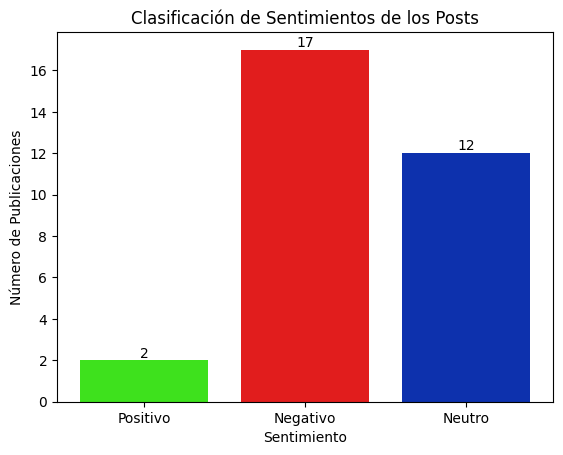

In [76]:
# Datos para el gráfico
sentiments = ["Positivo", "Negativo", "Neutro"]
counts = [len(posts_classification["Positivo"]), len(posts_classification["Negativo"]), len(posts_classification["Neutro"])]

# Colores para las barras
colors = ["#3EE11D", "#E11D1D", "#0D31AD"]

# Crear un gráfico de barras
plt.bar(sentiments, counts, color=colors)

# Mostrar el número total en cada barra
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha="center", va="bottom")

plt.xlabel("Sentimiento")
plt.ylabel("Número de Publicaciones")
plt.title("Clasificación de Sentimientos de los Posts")
plt.show()

# Resultados con frecuencia de comentarios

In [19]:
# Contar la frecuencia de los comentarios
comment_counts = Counter(all_comments)

# Encontrar los comentarios más repetidos
most_common_comments = comment_counts.most_common(10)  # Los 10 comentarios más comunes

# Imprimir los comentarios más repetidos
print("Comentarios más repetidos:")
for comment, count in most_common_comments:
    print(f"Comentario: {comment}")
    print(f"Repeticiones: {count}\n")

NameError: ignored

# Resultados

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


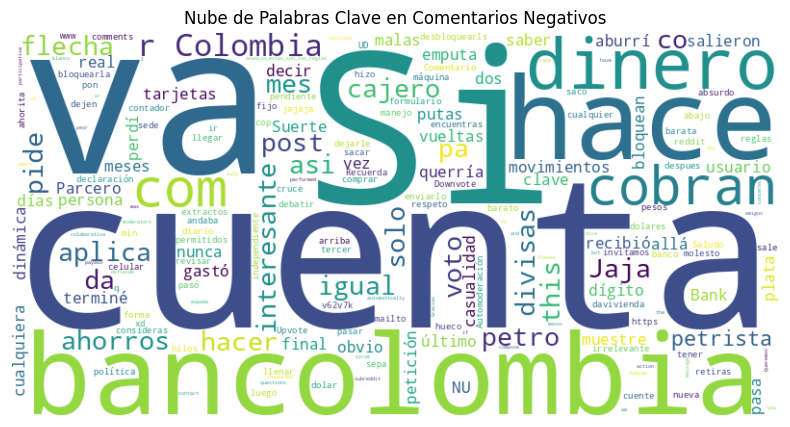

Comentarios más repetidos:
Comentario: Lo que me emputa es que no muestre movimientos más allá de dos meses. Porque obvio, ¿pa qué putas querría un usuario saber en qué gastó su plata hace 61 días?

Comentario: Pero NU Bank no le da tarjetas a cualquiera***

Comentario: Parcero, muy de malas que por un dígito terminé en una cuenta real. Suerte con eso, yo perdí 600.000 asi, a lo último me aburrí de tanto hacer vueltas y no salieron con nada. Bancolombia te va a decir que va a hacer la petición a la persona que recibió el dinero pero al final nunca pasa nada.

Comentario: Si de casualidad una vez te bloquean la clave dinámica y pide desbloquearls por cajero es solo ir al banco, sacar una nueva y bloquearla a los 10 min xd. Ya me pasó

Comentario: Jaja de igual forma la saco barata, jajaja dejarle el celular

Comentario: La declaración la hizo UD? Un contador le pide sus extractos y hace el cruce

Comentario: Hay un hueco en el tercer mes? 🤣

Comentario: Es una cuenta de ahorros, te cobr

In [77]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Procesar los comentarios negativos para identificar palabras clave
nltk.download('stopwords')
stop_words = set(stopwords.words("spanish"))
negative_comments_text = " ".join(negative_comments)
wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate(negative_comments_text)

# Visualizar la nube de palabras clave
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras Clave en Comentarios Negativos")
plt.show()

# Imprimir los comentarios más repetidos
print("Comentarios más repetidos:")
for comment in negative_comments[:10]:
    print(f"Comentario: {comment}\n")